In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import shutil

In [3]:
ca.set_log_level('INFO')

In [4]:
%matplotlib inline

In [5]:
pwd

'/Users/amnon/git/paper-metaanalysis/scripts'

# Load the data
### Without the known blooming bacteria (from American Gut paper)

In [6]:
ca.set_log_level('ERROR')
ratios=ca.read_amplicon('../ratios_rarefaction_4k/ratios_no_bloom.biom','../studies/index.csv',
                        feature_metadata_file='../taxonomy/DB1-15_taxonomy_svs_numbers.tsv',normalize=None, min_reads=None)
ca.set_log_level('INFO')

In [7]:
ratios.sparse = False
ratios

AmpliconExperiment with 59 samples, 433 features

## Fix taxonomy and filter chloroplast/mitochondria

In [8]:
ratios.feature_metadata['taxonomy'] = ratios.feature_metadata.Taxon

In [9]:
ratios.feature_metadata['taxonomy'].fillna('NA',inplace=True)

In [10]:
ratios = ratios.filter_by_taxonomy(['chloroplast','cyanobacteria','mitochondria'],negate=True)

2022-01-05 18:25:53 INFO 433 features remain.


In [11]:
disease_colors = {}
disease_colors = {xx: (0,0,0) for xx in ratios.sample_metadata.disease.unique()}
disease_colors.update({'HIV': (1.00,0.93,0.35),'Autism': (0.50,0.99,0.52),'Bipolar': (1.00, 0.63, 0.00),
         'IBD_Crohn disease': (0.72,0.11,0.11),'IBD_Ulcerative Colitis': (0.72,0.11,0.11),
         'IBD_Inflammtory bowel disease': (0.72,0.11,0.11),
         'Diabetes T2': (0.47,0.53,0.80),
         'Depression': (0.48,0.12,0.64),
         'Obesity': (0.25,0.32,0.71),
         'Parkinson’s': (0.29,0.08,0.55),
         'Schizophrenia': (0.88,0.75,0.91),     
         'Gastroenteritis': (0.94,0.33,0.31),
         'Heart diseases': (0.33,0.43,1.00),
         'Irritable bowel syndrom': (0.90,0.45,0.45),
         'Alzheimer': (0.83, 0.83, 0.83), 'Anorexia': (0.83, 0.83, 0.83), 'Cancer': (0.83, 0.83, 0.83), 'Autoimmun diseases': (0.83, 0.83, 0.83), 'C.difficile infection': (0.83, 0.83, 0.83), 
         'Cancer': (0.83, 0.83, 0.83), 'Chronic fatigue syndrome': (0.83, 0.83, 0.83), 'Diabetes T1': (0.83, 0.83, 0.83),  'Gout': (0.83, 0.83, 0.83),
         'Hepatitis B': (0.83, 0.83, 0.83), 'Hepatitis C': (0.83, 0.83, 0.83), 'Hypertension': (0.83, 0.83, 0.83), 
         'Lupus': (0.83, 0.83, 0.83), 'Pancreatitis': (0.83, 0.83, 0.83), 'Psoriasis': (0.83, 0.83, 0.83), 'Rheumatoid arthritis': (0.83, 0.83, 0.83), 
                
         })

### creat a chart pie for diseases

In [12]:
ratios.sample_metadata['pie_disease']=ratios.sample_metadata.disease.copy()
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Irritable bowel syndrom','IBS',inplace=True)
ratios.sample_metadata.pie_disease.replace('Hepatitis B','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Crohn disease','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Ulcerative Colitis','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('IBD_Inflammtory bowel disease','IBD',inplace=True)
ratios.sample_metadata.pie_disease.replace('Alzheimer','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Anorexia','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Autoimmun diseases','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Cancer','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('C.difficile infection','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Diabetes T1','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Hypertension','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Chronic fatigue syndrome','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('C.difficile infection','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Gout','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Lupus','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Pancreatitis','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Psoriasis','Other',inplace=True)
ratios.sample_metadata.pie_disease.replace('Rheumatoid arthritis','Other',inplace=True)

pass

In [13]:
disease_colors.update({'HIV': (1.00,0.93,0.35),'Autism': (0.50,0.99,0.52),
         'Bipolar': (1.00, 0.63, 0.00),
         'IBD': (0.72,0.11,0.11),     
         'Diabetes T2': (0.47,0.53,0.80),
         'Depression': (0.48,0.12,0.64),
         'Obesity': (0.25,0.32,0.71),
         'Parkinson’s': (0.29,0.08,0.55),
         'Schizophrenia': (0.88,0.75,0.91),     
         'Gastroenteritis': (0.94,0.33,0.31),
         'Heart diseases': (0.33,0.43,1.00),
         'IBS': (0.90,0.45,0.45),  
         'Other': (0.83, 0.83, 0.83)}) 

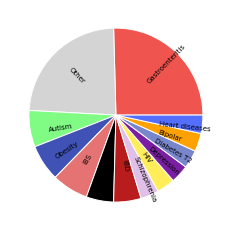

In [14]:
plt.figure()
pp=plt.pie(ratios.sample_metadata.pie_disease.value_counts(),textprops={'fontsize': 7}, labels=ratios.sample_metadata.pie_disease.unique(), labeldistance=0.5, rotatelabels=True)
for pie_wedge in pp[0]:
    pie_wedge.set_edgecolor('white')
    pie_wedge.set_facecolor(disease_colors[pie_wedge.get_label()])


### Prepare the colormap for the heatmaps
We want coolwarm, with white for exact 0s (which mean not present)

In [15]:
current_cmap = mpl.cm.get_cmap('coolwarm')
current_cmap.set_bad(color='red')
ncm = current_cmap(np.linspace(0,1,1000000))
ncm[500000]=(1,1,1,1)
ncm=mpl.colors.ListedColormap(ncm)

<ipython-input-15-ed222efa150a>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  current_cmap.set_bad(color='red')


# Look at the data

In [16]:
ratios.plot(gui='qt5',norm=None,cmap=ncm ,clim=[-0.5,0.5], bad_color='w')

creating logger


In [17]:
ratios=ratios.sort_abundance(key=np.mean)

In [18]:
cu.splot(ratios,'disease',norm=None,cmap=ncm,clim=[-0.5,0.5],xticks_max=None)


# Plot all bacteria

## aggregate all samples by disease so CD/UC count as 1

In [19]:
ratios_agg=ratios.aggregate_by_metadata('disease',agg='mean')
ratios_agg

AmpliconExperiment with 28 samples, 433 features

In [20]:
cu.splot(ratios_agg,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None)

In [21]:
ratios

AmpliconExperiment with 59 samples, 433 features

## Sort by mean abundance over all disease
With 1 sample per disease (aggregation by mean)

In [22]:
ratios_agg=ratios_agg.sort_abundance(key=np.mean)

In [23]:
cu.splot(ratios_agg,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None)

In [24]:
allbact = ratios.filter_ids(ratios_agg.feature_metadata.index)
allbact = allbact.sort_samples('disease')

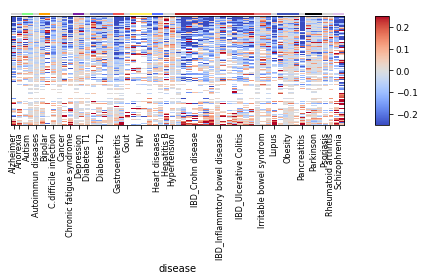

In [25]:
f=allbact.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None,
                   xticklabel_kwargs={'size':8, 'rotation':90}, barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)

In [26]:
f.save_figure('../figures/heatmap-allbact-rare4k.pdf')

# Plot the non-specific bacteria
Using the binomial sign test (only on experiments where the bacteria is present), with at least 4 experiments per bacteria. FDR=0.1

The test is done on 1 aggregated sample per disease to prevent bias by disease with many studies

In [27]:
np.random.seed(2020)
nonspecific_agg=cu.get_sign_pvals(ratios_agg,alpha=0.1,min_present=4)

keeping 411 features with enough ratios
found 85 significant


In [28]:
nonspecific = ratios.filter_ids(nonspecific_agg.feature_metadata.index)
nonspecific = nonspecific.sort_samples('disease')

In [29]:
nonspecific.feature_metadata = nonspecific.feature_metadata.join(nonspecific_agg.feature_metadata,lsuffix='',rsuffix='_agg')

In [30]:
cu.splot(nonspecific,'disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None)

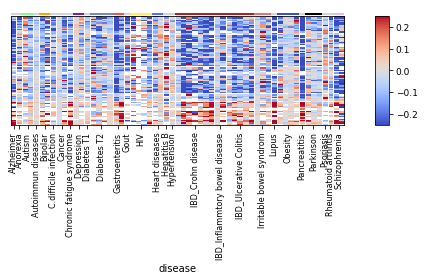

In [31]:
f=nonspecific.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],xticks_max=None,xticklabel_len=None,
                   xticklabel_kwargs={'size':8, 'rotation':90},barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)


In [32]:
f.save_figure('../figures/sup-heatmap-nonspecific-rare4k.pdf')

### Save the non-secific bacteria

In [33]:
nonspecific_agg.save('../ratios_rarefaction_4k/nonspecific/nonspecific')

In [34]:
nonspecific_agg.save_fasta('../ratios_rarefaction_4k/nonspecific/nonspecific.fa',header='seq')

In [35]:
nonspecific.save('../ratios_rarefaction_4k/nonspecific/nonspecific_all',fmt='txt')

2022-01-05 18:26:37 WARNING .txt format does not support taxonomy information in save. Saving without taxonomy.


### Also save only the ones going up or down

In [36]:
nsup_ids=nonspecific_agg.feature_metadata[nonspecific_agg.feature_metadata.esize > 0]
nsdown_ids=nonspecific_agg.feature_metadata[nonspecific_agg.feature_metadata.esize < 0]

In [37]:
len(nsup_ids)

19

In [38]:
len(nsdown_ids)

66

In [39]:
nsup = nonspecific.filter_ids(nsup_ids.index)
nsup.save('../ratios_rarefaction_4k/nonspecific/nonspecific-up')

In [40]:
nsdown = nonspecific.filter_ids(nsdown_ids.index)
nsdown.save('../ratios_rarefaction_4k/nonspecific/nonspecific-down')

## how many higher/lower in non-specific

In [41]:
np.sum(nonspecific_agg.feature_metadata.esize<0)

66

In [42]:
np.sum(nonspecific_agg.feature_metadata.esize>0)

19

## Get the enriched dbBact terms

In [43]:
nonspecific_agg.feature_metadata['_calour_stat'] = nonspecific_agg.feature_metadata['esize']
nonspecific_agg.feature_metadata['_calour_direction'] = 'down'
nonspecific_agg.feature_metadata.loc[nonspecific_agg.feature_metadata['esize']>0,'_calour_direction']='up'

2022-01-05 18:26:48 INFO Getting dbBact annotations for 85 sequences, please wait...
2022-01-05 18:26:50 INFO got 2338 annotations
2022-01-05 18:26:50 INFO Got 16798 annotation-sequence pairs
2022-01-05 18:26:50 INFO Added annotation data to experiment. Total 2338 annotations, 85 ASVs


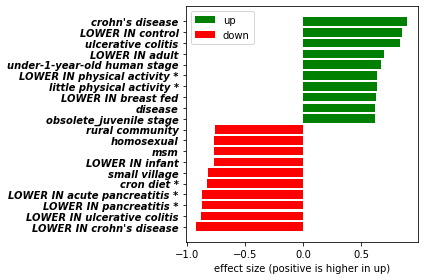

In [44]:
f,dterms = nonspecific_agg.plot_diff_abundance_enrichment()

In [45]:
f.figure.savefig('../figures/nonspecific-dbbact-terms-rare4k.pdf')

### Draw the dbbact term wordcloud for the non-specific bacteria

In [46]:
dbbact=ca.database._get_database_class('dbbact')

2022-01-05 18:26:53 INFO Getting dbBact annotations for 85 sequences, please wait...
2022-01-05 18:26:55 INFO got 2338 annotations
2022-01-05 18:26:55 INFO Got 16798 annotation-sequence pairs
2022-01-05 18:26:55 INFO Added annotation data to experiment. Total 2338 annotations, 85 ASVs


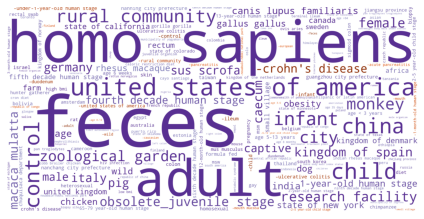

In [47]:
f=dbbact.draw_wordcloud(nonspecific)

In [48]:
f.savefig('../figures/sup-wordcloud-nonspecific-rare4k.pdf')

2022-01-05 18:27:02 INFO Getting dbBact annotations for 19 sequences, please wait...
2022-01-05 18:27:04 INFO got 1543 annotations
2022-01-05 18:27:04 INFO Got 3348 annotation-sequence pairs
2022-01-05 18:27:04 INFO Added annotation data to experiment. Total 1543 annotations, 19 ASVs


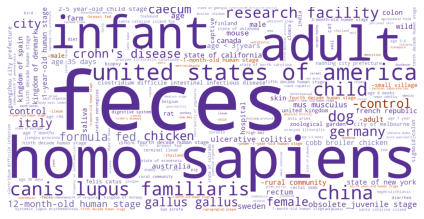

In [49]:
f=dbbact.draw_wordcloud(nsup)

In [50]:
f.savefig('../figures/sup-wordcloud-nonspecific-up-rare4k.pdf')

2022-01-05 18:27:11 INFO Getting dbBact annotations for 66 sequences, please wait...
2022-01-05 18:27:13 INFO got 1526 annotations
2022-01-05 18:27:13 INFO Got 13450 annotation-sequence pairs
2022-01-05 18:27:13 INFO Added annotation data to experiment. Total 1526 annotations, 66 ASVs


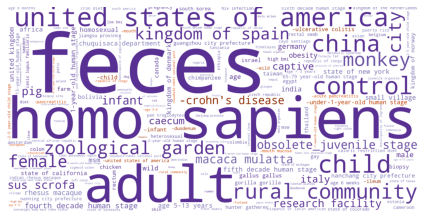

In [51]:
f=dbbact.draw_wordcloud(nsdown)

In [52]:
f.savefig('../figures/sup-wordcloud-nonspecific-down-rare4k.pdf')

# IBD specific

In [53]:
def nzdiff(data,labels):
    '''Calculate the mean difference between two groups without using 0s
    used for the calour.diff_abundance for only non-zero samples
    
    Parameters
    ----------
    data: np.array
        sample * feature(similar to calour Experiment.data)
    labels:::: np.array of 0s and 1s
        the label for each sample.
    
    Returns
    -------
    np.array
        for each feature, mean(group1:group1!=0)- mean(group2: group2!=0)
    '''
    data0=data[:,labels==0]
    data1=data[:,labels==1]
    res = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        m1=data1[i,:]
        m1=m1[m1!=0]
        if len(m1) == 0:
            continue
        m1=np.mean(m1)
        m0=data0[i,:]
        m0=m0[m0!=0]
        if len(m0) == 0:
            continue
        m0=np.mean(m0)
        res[i]= m1 - m0
    return res

In [54]:
def ratio_enrichment(exp, field, val1, val2=None, alpha=0.1, min_prev=3, random_seed=None, transform=None):
    '''Identify bacteria significantly enriched (i.e. ratios higher/lower) in samples with field=val1 vs. val2 (or all other samples if val2==None)
    Test is performed only on non-zero features present in at least min_prev samples in each group.
    
    Parameters
    ----------
    exp: calour.Experiment
        The experiment to test
    field: str
        Name of the field for identifying the 2 groups of samples
    val1: str or list of str
        Values of field for the first group of samples
    val2: str or list of str or None
        Values of field for the second group of samples. If None, use all samples not with val1
    alpha: float, optional
        the dsFDR threshold
    min_prev: int, optional
        use only bacteria present in at least min_prev samples (not 0) in each group
    random_seed: int, optional
    transform: str or None, optional
        the data transform (from ca.diff_abundance)
    '''
    # pre filter the data to keep only features present in enough samples in both groups
    e1 = exp.filter_samples(field, val1)
    e1.sparse=False
    e1.data[e1.data!=0] = 1
    e1 = e1.filter_sum_abundance(min_prev)
    if val2 is None:
        e2 = exp.filter_samples(field, val1, negate=True)
    else:
        e2 = exp.filter_samples(field, val2)
    e2.sparse=False
    e2.data[e2.data!=0] = 1
    e2 = e2.filter_sum_abundance(min_prev)
    # keep only features present in > min_prev samples in group1 and group2
    exp = exp.filter_ids(e1.feature_metadata.index)
    exp = exp.filter_ids(e2.feature_metadata.index)
    print('%d remaining after filtering for min_prev %d' % (len(exp.feature_metadata), min_prev))

    # find the features significantly different between group1 and group2
    # we use the nzdiff statist
    dd=exp.diff_abundance(field,val1,val2, transform=transform,alpha=alpha,method=nzdiff,random_seed=random_seed)
    return dd

### remove the biopsies studies

In [55]:
ratios_no_biop = ratios.filter_samples('_sample_id',['23', '29', '49', '52'],negate=True)
ratios_no_biop

AmpliconExperiment with 55 samples, 433 features

# Calculate the specific bacteria
## without the Gevers biopsies studies

In [59]:
def nice_taxonomy(exp):
    '''add nice taxonomy string (only phyla+genus+species if available) for heatmap
    
    Parameters
    ----------
    exp: calour.AmpliconExperiment
        with the taxonomy in 'Taxon' field
    
    Returns
    -------
    exp: calour.AmpliconExperiment, with added feature metadata field "nice_tax"
    '''
    nice_tax=[]
    for cidx,crow in exp.feature_metadata.iterrows():
        ctax = crow['Taxon']
        ctax=ctax.split(';')
        new_tax = ctax[1].split('_')[-1]+'|'
        if len(ctax) > 5:
            new_tax += ctax[5].split('_')[-1]
            if len(ctax) > 6:
                if len(ctax[6])>4:
                    new_tax += '|'+ctax[6].split('_')[-1]
        else:
            new_tax += ctax[-1].split('_')[-1]
        nice_tax.append(new_tax)
    newexp = exp.copy()
    newexp.feature_metadata['nice_tax'] = nice_tax
    return newexp

In [56]:
np.random.seed(2020)
specific_no_biop=ratio_enrichment(ratios_no_biop, 'disease',['IBD_Crohn disease','IBD_Ulcerative Colitis'],
                                  alpha=0.1, min_prev=3,random_seed=2020, transform='rankdata')

2022-01-05 18:27:22 WARNING Do you forget to normalize your data? It is required before running this function
2022-01-05 18:27:22 INFO After filtering, 381 remain.
2022-01-05 18:27:22 WARNING Do you forget to normalize your data? It is required before running this function
2022-01-05 18:27:22 INFO After filtering, 411 remain.
2022-01-05 18:27:22 WARNING 30 ids were not in the experiment and were dropped.
381 remaining after filtering for min_prev 3
2022-01-05 18:27:22 WARNING Do you forget to normalize your data? It is required before running this function
2022-01-05 18:27:22 INFO After filtering, 105 remain.
2022-01-05 18:27:22 INFO 10 samples with value 1 (['IBD_Crohn disease', 'IBD_Ulcerative Colitis'])
2022-01-05 18:27:26 INFO number of higher in IBD_Crohn disease,IBD_Ulcerative Colitis: 16. number of higher in NOT IBD_Crohn disease,IBD_Ulcerative Colitis : 2. total 18


In [57]:
specific_no_biop.save('../ratios_rarefaction_4k/ibd_specific/ibd-no-biopsies-specific')

In [58]:
specific_no_biop.save_fasta('../ratios_rarefaction_4k/ibd_specific/ibd-no-biopsies-specific')

In [60]:
specific_no_biop =  specific_no_biop.sort_samples('disease')

In [61]:
specific_no_biop = nice_taxonomy(specific_no_biop)

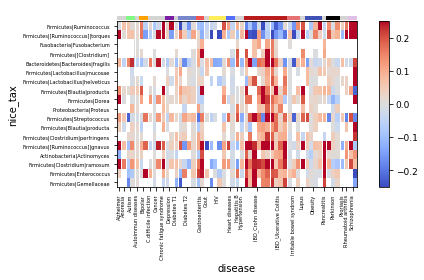

In [62]:
f=specific_no_biop.plot(sample_field='disease',norm=None,cmap=ncm,clim=[-0.25,0.25],
         xticks_max=None,xticklabel_len=None, xticklabel_kwargs={'size':5, 'rotation':90},
         feature_field='nice_tax', yticklabel_len=None, yticklabel_kwargs={'size':5}, barx_fields=['disease'],barx_label=False,barx_colors=disease_colors)

In [63]:
f.figure.savefig('../figures/sup-heatmap-specific-rare4k.pdf')

2022-01-05 18:28:08 INFO Getting dbBact annotations for 18 sequences, please wait...
2022-01-05 18:28:09 INFO got 1821 annotations
2022-01-05 18:28:09 INFO Got 3841 annotation-sequence pairs
2022-01-05 18:28:09 INFO Added annotation data to experiment. Total 1821 annotations, 18 ASVs


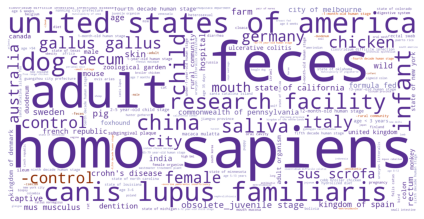

In [64]:
f=dbbact.draw_wordcloud(specific_no_biop)

In [65]:
f.savefig('../figures/sup-wordcloud-specific-rare4k.pdf')

# Draw venn diagram for overlaps

In [63]:
ns_norarefaction_down = pd.read_csv('../ratios/nonspecific/nonspecific-down_feature.txt',sep='\t')
ns_rarefaction_down = pd.read_csv('../ratios_rarefaction_4k/nonspecific/nonspecific-down_feature.txt',sep='\t')

ns_norarefaction_up = pd.read_csv('../ratios/nonspecific/nonspecific-up_feature.txt',sep='\t')
ns_rarefaction_up = pd.read_csv('../ratios_rarefaction_4k/nonspecific/nonspecific-up_feature.txt',sep='\t')

In [64]:
import matplotlib_venn

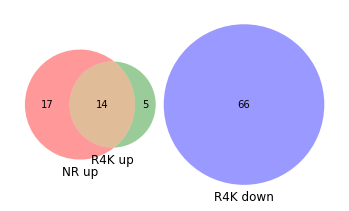

In [69]:
f=plt.figure()
matplotlib_venn.venn3([set(ns_norarefaction_up['_feature_id'].values),set(ns_rarefaction_up['_feature_id'].values),set(ns_rarefaction_down['_feature_id'].values)],set_labels=['NR up','R4K up','R4K down'])
f.savefig('../figures/sup-fig-venn-rarefaction-up.pdf')

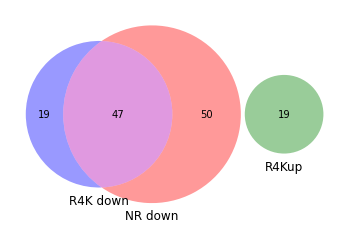

In [71]:
f=plt.figure()
matplotlib_venn.venn3([set(ns_norarefaction_down['_feature_id'].values),set(ns_rarefaction_up['_feature_id'].values),set(ns_rarefaction_down['_feature_id'].values)],set_labels=['NR down','R4Kup','R4K down'])
f.savefig('../figures/sup-fig-venn-rarefaction-down.pdf')

In [74]:
spec_norarefaction = pd.read_csv('../ratios/ibd_specific/ibd-no-biopsies-specific_feature.txt',sep='\t')
spec_lefse = pd.read_csv('../ratios_rarefaction_4k/ibd_specific/ibd-no-biopsies-specific_feature.txt',sep='\t')


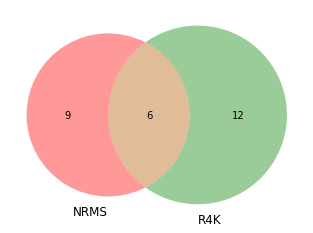

In [76]:
f=plt.figure()
matplotlib_venn.venn2([set(spec_norarefaction['_feature_id'].values),set(spec_lefse['_feature_id'].values)],set_labels=['NRMS','R4K'])
# f.savefig('../figures/sup-fig-venn-lefse-down.pdf')

In [77]:
ib=set(spec_norarefaction['_feature_id'].values).intersection(set(spec_lefse['_feature_id'].values))

In [78]:
print([spec_norarefaction[spec_norarefaction['_feature_id']==x]['SV_number'].values for x in ib])

[array(['SV14256'], dtype=object), array(['SV15498'], dtype=object), array(['SV11007'], dtype=object), array(['SV09000'], dtype=object), array(['SV13351'], dtype=object), array(['SV09357'], dtype=object)]
